<a href="https://colab.research.google.com/github/HeeSeok-Kwon/GDSC/blob/main/Convolution_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
# 내가 필요한 라이브러리 import
from keras.models import Sequential#을 사용해서
# 딥러닝의 구조에서 층을 쌓겠다는 선언을 해주고
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 테스트셋과 학습셋 분리하는 기능 : train_test_split
#from sklearn.model_selection import train_test_split

# mnist 사용 
from keras.datasets import mnist

# one-hot encoding(10개의 숫자 리스트에서 어느 위치에 가장 큰 값, 즉 이미지의 숫자 위치를 파악할 때 사용되는 함수
from keras.utils import np_utils

In [ ]:
# 가중치 랜덤수 실행, 실행할때마다 다른 랜덤수 발생 시 정확도 파악 어렵기 때문에 랜덤수를 고정
seed = 5
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print("train set 이미지수 : %d개" %(X_train.shape[0]))
print("test set 이미지수 : %d개" %(X_test.shape[0]))

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
train set 이미지수 : 60000개
test set 이미지수 : 10000개


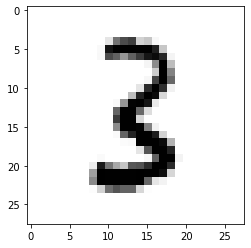

In [ ]:
plt.imshow(X_train[50000], cmap='Greys')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_train = X_train.astype('float32')
X_train = X_train / 255
X_test = X_test.reshape(-1,28,28,1).astype('float32') / 255  

In [ ]:
Y_train = np_utils.to_categorical(Y_class_train)
Y_test = np_utils.to_categorical(Y_class_test)
print(Y_class_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) # 과적합 방지
model.add(Flatten())
model.add(Dense(128, activation = 'relu')) # relu 은닉층에 주로 사용
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax')) # 다중분류
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train, epochs = 30,batch_size=200) 

Epoch 1/30
300/300 [==============================] - 36s 20ms/step - loss: 0.2636 - accuracy: 0.9201
Epoch 2/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0869 - accuracy: 0.9747
Epoch 3/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0665 - accuracy: 0.9797
Epoch 4/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0520 - accuracy: 0.9844
Epoch 5/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0455 - accuracy: 0.9857
Epoch 6/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0386 - accuracy: 0.9876
Epoch 7/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0342 - accuracy: 0.9891
Epoch 8/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0306 - accuracy: 0.9902
Epoch 9/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 10/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0263 - accur